# Candlestick Separating Lines

https://patternswizard.com/separating-lines-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Rising/Falling Three Methods

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

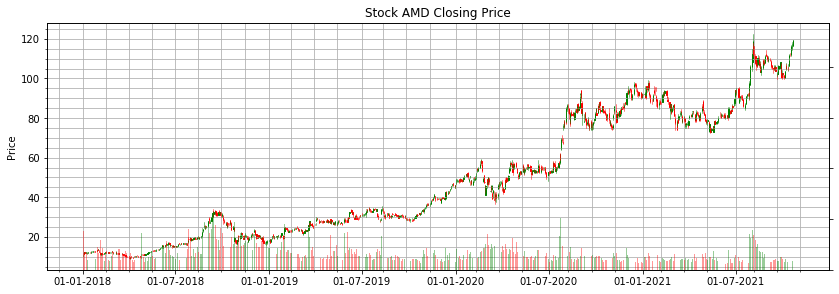

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
separating_lines = talib.CDLSEPARATINGLINES(df['Open'], df['High'], df['Low'], df['Close'])

separating_lines = separating_lines[separating_lines != 0]

In [6]:
df['separating_lines'] = talib.CDLSEPARATINGLINES(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['separating_lines'] !=0]

,Open,High,Low,Close,Adj Close,Volume,separating_lines
Date,,,,,,,
2018-10-02,30.730000,30.820000,28.650000,29.020000,29.020000,145276500,-100
2019-01-24,20.059999,21.010000,20.040001,20.850000,20.850000,97433400,100
2019-06-06,29.870001,31.980000,29.840000,31.820000,31.820000,131267800,100
2020-04-06,44.299999,47.580002,44.060001,47.520000,47.520000,82294000,100
2020-08-04,78.029999,85.809998,77.989998,85.040001,85.040001,155676100,100
2020-10-05,82.550003,86.279999,82.550003,86.150002,86.150002,47056500,100
2021-03-31,76.570000,79.129997,76.519997,78.500000,78.500000,43659500,100
2021-06-15,81.589996,81.680000,80.220001,80.470001,80.470001,26194300,-100


In [8]:
df['Adj Close'].loc[df['separating_lines'] !=0]

Date
2018-10-02    29.020000
2019-01-24    20.850000
2019-06-06    31.820000
2020-04-06    47.520000
2020-08-04    85.040001
2020-10-05    86.150002
2021-03-31    78.500000
2021-06-15    80.470001
Name: Adj Close, dtype: float64

In [9]:
df['separating_lines'].loc[df['separating_lines'] !=0].index

DatetimeIndex(['2018-10-02', '2019-01-24', '2019-06-06', '2020-04-06',
               '2020-08-04', '2020-10-05', '2021-03-31', '2021-06-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
separating_lines

Date
2018-10-02   -100
2019-01-24    100
2019-06-06    100
2020-04-06    100
2020-08-04    100
2020-10-05    100
2021-03-31    100
2021-06-15   -100
dtype: int32

In [11]:
separating_lines.index

DatetimeIndex(['2018-10-02', '2019-01-24', '2019-06-06', '2020-04-06',
               '2020-08-04', '2020-10-05', '2021-03-31', '2021-06-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,separating_lines
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-15,112.510002,112.839996,111.110001,112.120003,112.120003,34177700,0
2021-10-18,111.900002,116.879997,111.370003,116.430000,116.430000,47537800,0
2021-10-19,116.160004,117.169998,114.470001,116.330002,116.330002,39593900,0


Text(0, 0.5, 'Price')

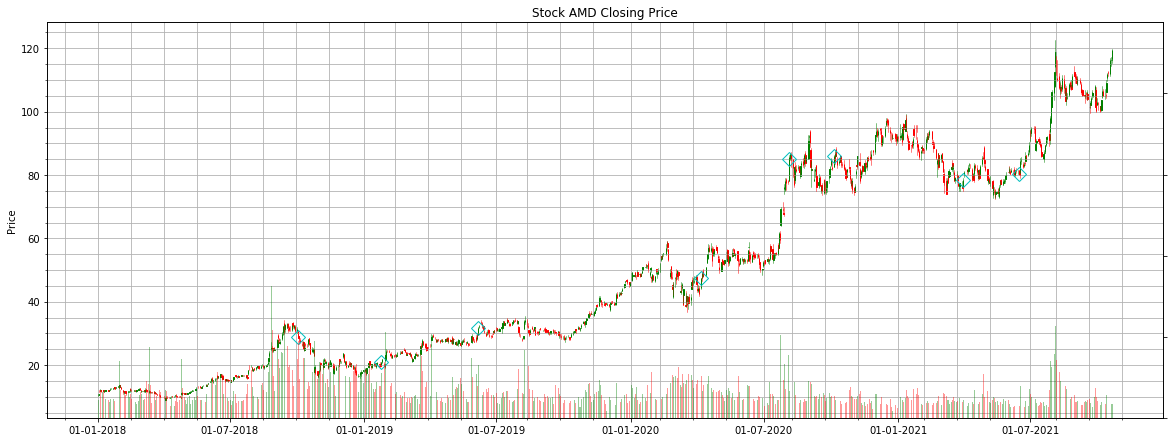

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['separating_lines'] !=0].index, df['Adj Close'].loc[df['separating_lines'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-06-01':'2021-06-30']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,separating_lines,VolumePositive
0,737942.0,81.010002,82.910004,80.660004,80.809998,80.809998,43433000,0,False
1,737943.0,81.000000,82.599998,80.660004,81.970001,81.970001,35203200,0,True
2,737944.0,81.129997,81.889999,80.260002,80.279999,80.279999,29812000,0,False
3,737945.0,80.919998,82.190002,80.809998,81.580002,81.580002,26387800,0,True
4,737948.0,81.400002,81.680000,80.379997,81.349998,81.349998,29006800,0,False


Text(0, 0.5, 'Price')

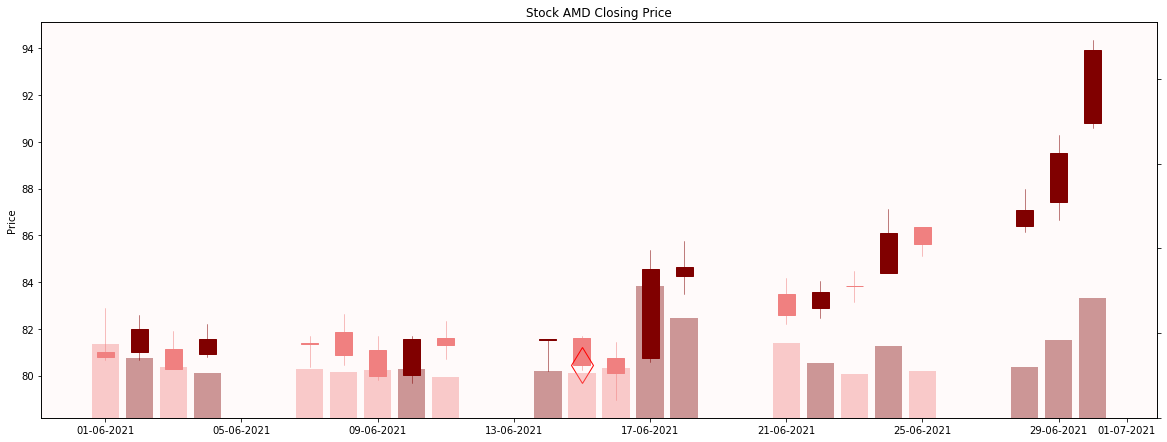

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('snow')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='maroon', colordown='lightcoral', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['separating_lines'] !=0].index, df['Adj Close'].loc[df['separating_lines'] !=0],
                'dr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'maroon', False: 'lightcoral'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

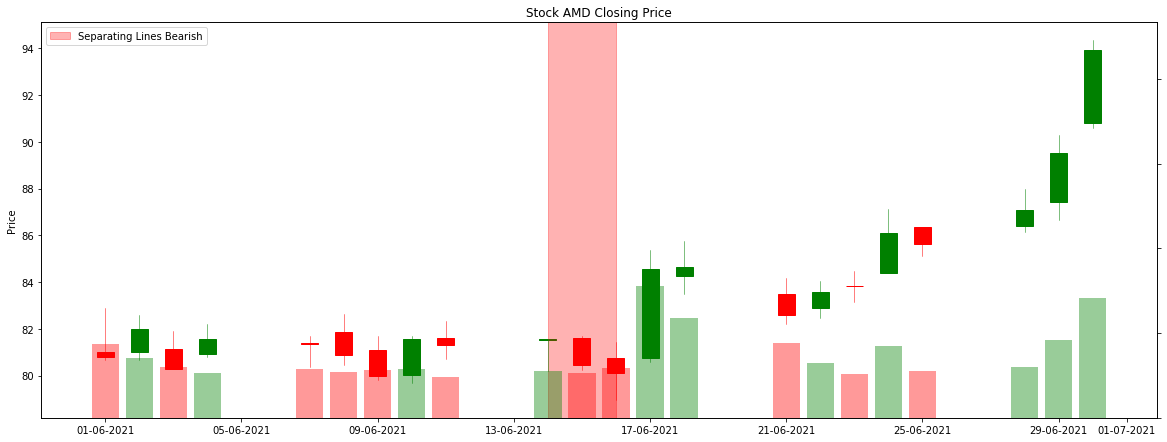

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,6,14)), date2num(datetime(2021,6,16)), 
           label="Separating Lines Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')